# Single Layer Perceptron

_Single-layer perceptron_ is the simplest instance of a neural network, where the output is the result of applying a _Heaviside activation function_ to a weighted sum of inputs.

The perceptron is defined as $z = H(w^Tx - b)$, where $x$ is a vector of inputs, $w$ is the vector of weights (by definition of the dot product, $||w|| = ||x||$), $b$ is the activation threshold (bias), and $H$ is the activation function, $$H(x) = \begin{cases}1 \text{ if } x \geq 0,\\ 0 \text{ otherwise}\end{cases}$$

When computing the sum, we can treat the bias as a weight applied to a constant input ($-1$).

In [1]:
import numpy as np

def wsum(inputs, weights, bias):
  inputs_w_bias = np.append(inputs, -1)
  weights_w_bias = np.append(weights, bias)
  
  return np.dot(inputs_w_bias, weights_w_bias)

def H(x): return 1 if x >= 0 else 0

## Learning

Weights and bias are learned by _training_ the network on input vectors $\{x_1, ..., x_n\}$ and corresponding desired outputs $\{y_1, ..., y_n\}$. The goal of training is to find such $w$ and $b$ so that all inputs produce desired outputs, starting from some initial (random) $w$ and $b$. The learning proceeds as follows:

For each input vector, the output of the perceptron is computed and compared to the desired value. If they match, we advance to the next input. Otherwise, we update the weights, $w'_{i} = w_i \pm x_i$ (with $+$ in case of a false negative, $-$ in case of a false positive) and the bias, $b' = b \pm 0.1$, where 0.1 is just an arbitrary rate of learning.

We reiterate through inputs until all of them produce correct outputs.

In [2]:
def learn(inputs, outputs):
  return learn_step(inputs, outputs, weights = np.random.rand(len(inputs[0])), bias = .0)

def learn_step(inputs, outputs, weights, bias):
  all_correct = True
  
  for (training_input, desired_output) in zip(inputs, outputs):
    actual_output = H(wsum(training_input, weights, bias))

    all_correct &= actual_output == desired_output

    if actual_output < desired_output:
      print(f'{training_input} yielded a false negative, incrementing the weights')
      new_weights = weights + training_input
      bias = bias - 0.1
    elif actual_output > desired_output:
      print(f'{training_input} yielded a false positive, decrementing the weights')
      new_weights = weights - training_input
      bias = bias + 0.1
    else:
      print(f'{training_input} yielded a correct result')

  if all_correct:
    print('All training samples return correct outputs, halting')
    return (weights, bias)
  else:
    print('Some of the outputs did not match desired values, performing another iteration')
    return learn_step(inputs, outputs, weights, bias)

## Example

As an example, let's proceed to implement the OR binary function as a perceptron.

In [3]:
inputs_or = [[a, b] for a in [0, 1] for b in [0, 1]]
outputs_or = [a | b for [a, b] in inputs_or]

(weights_or, bias_or) = learn(inputs_or, outputs_or)
print(f'Final weights are {weights_or}, bias is {bias_or}')

[0, 0] yielded a false positive, decrementing the weights
[0, 1] yielded a correct result
[1, 0] yielded a correct result
[1, 1] yielded a correct result
Some of the outputs did not match desired values, performing another iteration
[0, 0] yielded a correct result
[0, 1] yielded a correct result
[1, 0] yielded a correct result
[1, 1] yielded a correct result
All training samples return correct outputs, halting
Final weights are [0.16481331 0.43845237], bias is 0.1


We can visualize the decision boundary of the perceptron:

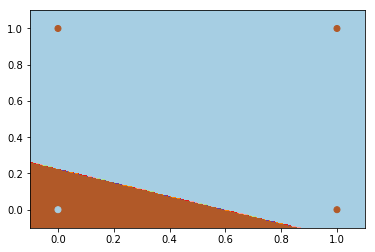

In [6]:
import matplotlib.pyplot as plt

def plot_decision_boundary(inputs, outputs, weights, bias):
  inputs = np.array(inputs)
  
  pts = np.arange(inputs.min() - 0.1, inputs.max() + 0.1, .006)
  xs, ys = np.meshgrid(pts, pts)
  zs = np.array([H(wsum(inps, weights, bias))
                 for inps in np.c_[xs.ravel(), ys.ravel()]]).reshape(xs.shape)

  fig, ax = plt.subplots()
  ax.contourf(xs, ys, zs, cmap=plt.cm.Paired_r)
  ax.scatter(np.array(inputs)[:, 0], np.array(inputs_or)[:, 1], c=outputs, cmap=plt.cm.Paired)
  
plot_decision_boundary(inputs_or, outputs_or, weights_or, bias_or)

Let's do the same for binary AND:

[0, 0] yielded a false positive, decrementing the weights
[0, 1] yielded a false positive, decrementing the weights
[1, 0] yielded a false positive, decrementing the weights
[1, 1] yielded a correct result
Some of the outputs did not match desired values, performing another iteration
[0, 0] yielded a correct result
[0, 1] yielded a correct result
[1, 0] yielded a false positive, decrementing the weights
[1, 1] yielded a correct result
Some of the outputs did not match desired values, performing another iteration
[0, 0] yielded a correct result
[0, 1] yielded a correct result
[1, 0] yielded a correct result
[1, 1] yielded a correct result
All training samples return correct outputs, halting
Final weights are [0.31331578 0.25963938], bias is 0.4


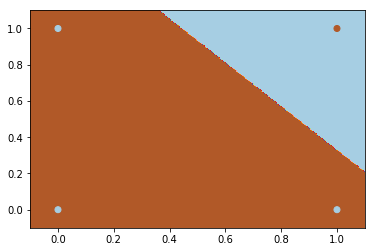

In [10]:
inputs_and = [[a, b] for a in [0, 1] for b in [0, 1]]
outputs_and = [a & b for [a, b] in inputs_or]

(weights_and, bias_and) = learn(inputs_and, outputs_and)
print(f'Final weights are {weights_and}, bias is {bias_and}')

plot_decision_boundary(inputs_and, outputs_and, weights_and, bias_and)

The key takeaway is, a single perceptron can only classify linearly separable patterns, which severely limits the number of problems it _can_ solve. Even certain binary functions (XOR) are out of its reach.

To overcome this, larger networks have several perceptrons stacked in a _layer_. At least one of the layers (called a _hidden_ layer) acts as an input to the succeeding one. This makes training more complicated, since the relationship between the weights of hidden layers and network output is not linear.